In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import re
from wordcloud import WordCloud
import gensim.downloader as api
from sklearn.model_selection import train_test_split

%matplotlib inline

# 1. Data Exploration and Visualization

In [3]:
df = pd.read_csv("dataset1.csv")
pd.set_option('max_colwidth', 800)
df

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology\r\nJanuary 2015 D..."
3,Data Science,"Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 mo..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription -"
...,...,...
957,Testing,"Computer Skills: â¢ Proficient in MS office (Word, Basic Excel, Power point) Strength: â¢ Hard working, Loyalty & Creativity â¢ Self-motivated, Responsible & Initiative â¢ Good people management skill & positive attitude. â¢ knowle

<Axes: xlabel='count', ylabel='Category'>

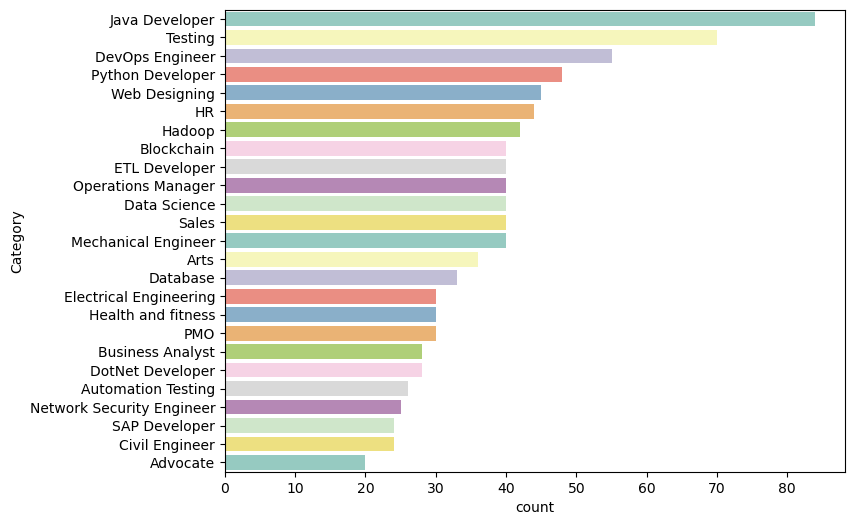

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order=df['Category'].value_counts().index)

In [5]:
others = ["Advocate", "Arts", "Health and fitness"]
business = ["Business Analyst", "HR", "PMO", "Sales", "Operations Manager"]
developers = ["DotNet Developer", "ETL Developer", "Java Developer", "Python Developer", "SAP Developer", "Web Designing"]
engineer = ["Civil Engineer", "Electrical Engineering", "Mechanical Engineer"]
backend = ["Blockchain", "Hadoop", "Database", "Data Science", "DevOps Engineer", "Network Security Engineer"]
QA = ["Automation Testing", "Testing"]


def groupByRole(row):
    job = row.Category
    
    if job in others:
        return "others"
    elif job in business:
        return "business"
    elif job in developers:
        return "developer"
    elif job in engineer:
        return "engineer"
    elif job in backend:
        return "backend"
    elif job in QA:
        return "QA"
    else:
        print(job)
        return "n/a"
    
df["Group"] = df.apply(groupByRole, axis="columns")
count = df.groupby("Group").Group.count()

count

Group
QA            96
backend      235
business     182
developer    269
engineer      94
others        86
Name: Group, dtype: int64

In [6]:
df["Resume"].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

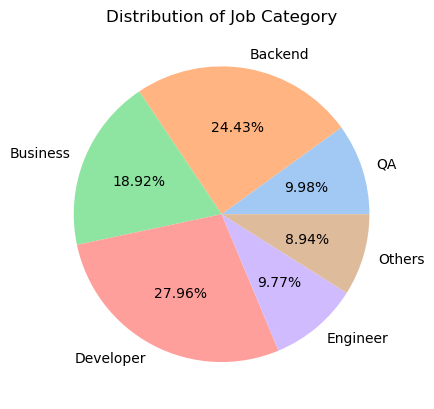

In [7]:
labels = ["QA", "Backend", "Business", "Developer", "Engineer", "Others"]

sns.set_palette('pastel')
pieChart = plt.pie(count, autopct='%.2f%%', labels=labels)
plt.title("Distribution of Job Category")
plt.show()

# 2. Cleaning the Data-Set

In [8]:
def lookup(target="", data=df, catg="Resume"):
    for line in data.loc[data[catg].str.contains(target, regex=False)].values:
        print(str(line) + '\n')

In [9]:
def cleanData(uncleanedText):
    uncleanedText = re.sub(r"\b(\d{3})[-.]?(\d{3})[-.]?(\d{4})\b", "", uncleanedText) # Removes Phone Number
    uncleanedText = re.sub(r"\b(\d{10})\b", "", uncleanedText) # Removes Phone Number P2
    uncleanedText = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b", "", uncleanedText) # Removes Email
    uncleanedText = re.sub("http[s]?\://\S+","",uncleanedText) # Removes Links
    uncleanedText = re.sub(r"(\r)|(\n)", " ", uncleanedText) # Removes Escape Characters \r and \n
    uncleanedText = re.sub(r"(\t)", "", uncleanedText) # Removes Escape Characters \t
    uncleanedText = re.sub("&", "and", uncleanedText) # Replaces & With and
    uncleanedText = re.sub("\s+", " ", uncleanedText)  # Remove Extra Whitespace
    uncleanedText = re.sub(r"[^\x00-\x7f]", r" ", uncleanedText) # Removes Non-Ascii Characters
    uncleanedText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), "", uncleanedText)  
    # remove punctuations
    return uncleanedText.lower() # Lowercase everything

df["Cleaned Resume"] = df.Resume.apply(cleanData)
df["Cleaned Resume"].iloc[0]

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm na  ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca and neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst and young llp skill details javascript exprience  24 months jquery exprience  24 months python exprience  24 monthscompany details company  ernst and young llp description  fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists 

# 3. Preparing Data For Training

## Vectorization of Dataset

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading NLTK Files for Language Processing
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/ethanrong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# Lemanization
lemmatizer = WordNetLemmatizer()

def lemmatizerFunction(row):
    returnString = ""
    for word in str(row).split():
        returnString += " " + lemmatizer.lemmatize(word)
    return returnString
df["Cleaned Resume"] = df["Cleaned Resume"].apply(lemmatizerFunction)

# Tokenize Words
stop_words = set(stopwords.words("english"))

def tokenizeFunction(row):
    return word_tokenize(row)
df["Cleaned Resume"] = df["Cleaned Resume"].apply(tokenizeFunction)

# Removing Stop Words
def removeStopWords(row):
    return np.array([word for word in row if word.casefold() not in stop_words])
df["Cleaned Resume"] = df["Cleaned Resume"].apply(removeStopWords)

df

,Category,Resume,Group,Cleaned Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",backend,"[skill, programming, language, python, panda, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, na, bayes, knn, random, forest, decision, tree, boosting, technique, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, net, database, visualization, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, cs, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understanding, deep, learningeducation, detail, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp, skill, detail, jav..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",backend,"[education, detail, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, detail, python, exprience, le, 1, year, month, statsmodels, exprience, 12, month, aws, exprience, le, 1, year, month, machine, learning, exprience, le, 1, year, month, sklearn, exprience, le, 1, year, month, scipy, exprience, le, 1, year, month, kera, exprience, le, 1, year, monthscompany, detail, company, matelabs, description, ml, platform, business, professional, dummy, enthusiast, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, deployed, auto, preprocessing, step, machine, learning, mainly, missing, value, treatment, outlier, detection, encoding, scaling, feature, selection, dimensionality, reduction, deployed, automated, classific..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Elect

In [12]:
from gensim.models import KeyedVectors

# Loading Model From Local Directory
try:
    model = KeyedVectors.load('wordEmbeding.d2v')
except FileNotFoundError:
    model = api.load("fasttext-wiki-news-subwords-300")
    model.save("wordEmbeding")

In [13]:
errorWords = {}

# Vectorizing Each Resume
def vectorizedResume(row):
    returnArray = np.array([])
    numberOfError = 0
    global errorWords
    
    for i, token in enumerate(row):
        try:
            returnArray = np.append(returnArray, np.array(model[token])).reshape(i+1-numberOfError, 300)
        except KeyError:
            numberOfError += 1
            
            if token in errorWords.keys() and token != "monthscompany": # months company is one of the largest errors
                errorWords[token] += 1
            else:
                errorWords[token] = 1
    return returnArray.T  # Transpose To Ensure Each Word Lines Down [word1, word2.....]

df["Vectorized Resume"] = df["Cleaned Resume"].apply(vectorizedResume)
df["Vectorized Resume"].sample(2)

629    [[0.007224000059068203, -0.034060999751091, -0.025682000443339348, -0.09101500362157822, 0.016311999410390854, 0.0007283299928531051, 0.011110999621450901, -0.11337999999523163, 0.006104299798607826, 0.015908999368548393, -0.09278800338506699, 0.012551000341773033, -0.014573000371456146, 0.017149999737739563, 0.043547000735998154, 0.017149999737739563, -0.007450600154697895, -0.013768999837338924, 0.005830000154674053, 0.0031940999906510115, -0.03553299978375435, -0.013768999837338924, -0.008532200008630753, 0.0031940999906510115, -0.03553299978375435, 0.0011747999815270305, 0.013427999801933765, -0.04182000085711479, 0.021662000566720963, -0.04773800075054169, 0.03785499930381775, -0.04773800075054169, -0.0038501000963151455, 0.018662000074982643, 0.0524430014193058, -0.06946499645709...
118    [[0.00633540004491806, 0.013766000047326088, -0.010432999581098557, -0.0635799989104271, 0.01853800006210804, -0.002645599888637662, -0.0314130000770092, -0.03036300092935562, -0.0897909

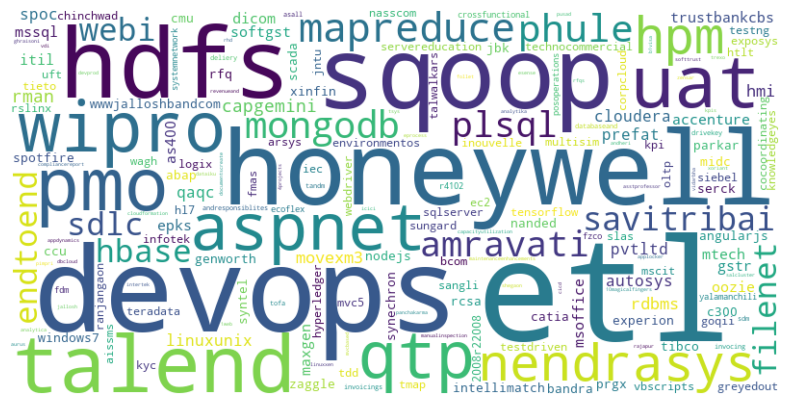

In [14]:
# Visualizing The Top Errors and Disgarding The Ones With Less Than 5 Hits
errorWords = {k: v for k, v in errorWords.items() if v > 5}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(errorWords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Clearly some technical words are being ignored by the vectorizer. Therefore, we must account for these in a later revision

In [15]:
# Finding Longest Resume
longestResume = 0
def findLongestResume(row):
    global longestResume
    global longestIndex
    
    if row.shape[1] > longestResume:
        longestResume = row.shape[1]
    return row
df["Vectorized Resume"].apply(findLongestResume)

# Adding Padding (Used Exclusively for CNN Method
padding = int(longestResume)
def addPadding(row):
    global padding
    pad_width = ((0, 0), (0, padding-row.shape[1]))  
    return np.pad(row, pad_width, constant_values=0)

df["Padded Resume"] = df["Vectorized Resume"].apply(addPadding)
df["Padded Resume"].iloc[0].shape == df["Padded Resume"].iloc[3].shape, df["Padded Resume"].iloc[3].shape

(True, (300, 1440))

# 4. One Hot Encoding Each Category & Splitting Testing/Training¶

In [26]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One Hot Encoding Results
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["Category"])
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

# Taking Data and Turning It Into A 
reshaped_data = df['Padded Resume'].apply(lambda x: np.reshape(x, (1, x.shape[0], x.shape[1])))
X = np.concatenate(reshaped_data.to_numpy(), axis=0)
y, X.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 (962, 300, 1440))

In [27]:
from sklearn.model_selection import train_test_split

# Splitting Training/Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Building Model and Evaluating Performance

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Defining A Model
def buildModel():
    model = Sequential([
        Conv1D(32, kernel_size=5, activation="relu", input_shape=(300, 1440, 1)),
        MaxPooling2D(pool_size=5),

        Conv1D(32, kernel_size=5, activation="relu"),
        MaxPooling2D(pool_size=5),

        Flatten(),
        Dense(128, activation="relu"),
        Dense(25, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Building Model
model = buildModel()
model.fit(X_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          validation_data=(X_test, y_test))

Epoch 1/10


2023-06-24 03:36:55.234173: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 33s 1s/step - loss: 2.9202 - accuracy: 0.1743 - val_loss: 2.6663 - val_accuracy: 0.2487
Epoch 2/10
25/25 [==============================] - 32s 1s/step - loss: 2.4246 - accuracy: 0.3082 - val_loss: 2.3033 - val_accuracy: 0.2694
Epoch 3/10
25/25 [==============================] - 28s 1s/step - loss: 1.8949 - accuracy: 0.4616 - val_loss: 1.7122 - val_accuracy: 0.5130
Epoch 4/10
25/25 [==============================] - 29s 1s/step - loss: 1.4134 - accuracy: 0.5813 - val_loss: 1.4714 - val_accuracy: 0.5596
Epoch 5/10
25/25 [==============================] - 27s 1s/step - loss: 1.1502 - accuracy: 0.6879 - val_loss: 1.0948 - val_accuracy: 0.6891
Epoch 6/10
25/25 [==============================] - 22s 845ms/step - loss: 0.7823 - accuracy: 0.7854 - val_loss: 0.8607 - val_accuracy: 0.7720
Epoch 7/10
25/25 [==============================] - 21s 815ms/step - loss: 0.6491 - accuracy: 0.8205 - val_loss: 0.6987 - val_accuracy: 0.8135
Epoch 8/10
25/25 [=======

In [ ]:
# Visualizing Predictions
def visualizePred(pred, test):
    pred = np.sum(pred, axis=0)
    test = np.sum(y_test, axis=0)
    index = list(range(len(pred)))

    # Creating Residual Graph
    res = test - pred
    sns.barplot(x=index, y=res, color="r")
    plt.xlabel('Category')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

visualizePred(f, y_test)

In [31]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://9217c0db-690d-4de0-a37b-c3b431b6ecda/assets


INFO:tensorflow:Assets written to: ram://9217c0db-690d-4de0-a37b-c3b431b6ecda/assets


# 6. Hyperparameter Tuning